In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/Climate_change_links_2.xlsx')
data = df[["VideoID", "Effectiveness2"]]
data

,VideoID,Effectiveness2
0,pvuN_WvF1to,1.0
1,eRLJscAlk1M,3.0
2,VbiRNT_gWUQ,2.0
3,5dVcn8NjbwY,NaN
4,5scez5dqtAc,3.0
...,...,...
185,TZ0j6kr4ZJ0,2.0
186,8DiWzvE52ZY,2.0
187,OwqIy8Ikv-c,1.0
188,lPgZfhnCAdI,1.0


In [3]:
# clean data
data = data.loc[(data["Effectiveness2"] == 1) | (data["Effectiveness2"] == 2) | (data["Effectiveness2"] == 3) | (data["Effectiveness2"] == 4) | (data["Effectiveness2"] == 5)]
data = data.reset_index()
del data["index"]
data

,VideoID,Effectiveness2
0,pvuN_WvF1to,1.0
1,eRLJscAlk1M,3.0
2,VbiRNT_gWUQ,2.0
3,5scez5dqtAc,3.0
4,JDcro7dPqpA,1.0
...,...,...
163,TZ0j6kr4ZJ0,2.0
164,8DiWzvE52ZY,2.0
165,OwqIy8Ikv-c,1.0
166,lPgZfhnCAdI,1.0


In [4]:
## Custom encoder
def custom_encoder(df):
    df.replace(to_replace = 1, value = "ineffective", inplace=True)
    df.replace(to_replace = 2, value = "neutral", inplace=True)
    df.replace(to_replace = 3, value = "effective", inplace=True)

custom_encoder(df['Effectiveness2'])

data = df[["VideoID", "Effectiveness2"]]
data = data.loc[(data["Effectiveness2"] == 'ineffective') | (data["Effectiveness2"] == 'neutral') | (data["Effectiveness2"] == 'effective')]
data = data.reset_index()
del data["index"]
data

,VideoID,Effectiveness2
0,pvuN_WvF1to,ineffective
1,eRLJscAlk1M,effective
2,VbiRNT_gWUQ,neutral
3,5scez5dqtAc,effective
4,JDcro7dPqpA,ineffective
...,...,...
163,TZ0j6kr4ZJ0,neutral
164,8DiWzvE52ZY,neutral
165,OwqIy8Ikv-c,ineffective
166,lPgZfhnCAdI,ineffective


[Text(0, 0, '70'), Text(0, 0, '37'), Text(0, 0, '61')]

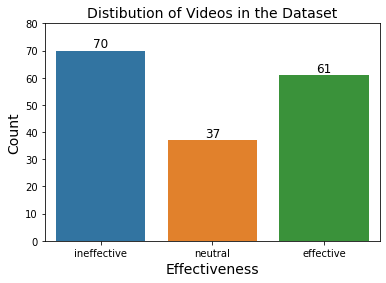

In [5]:
ax = sns.countplot(x="Effectiveness2", data=data, order=["ineffective","neutral","effective"])
plt.title('Distibution of Videos in the Dataset', size=14)
plt.xlabel("Effectiveness", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0,80)
ax.bar_label(ax.containers[0], size=12, label_type='edge')
#wax.figure.savefig("Effectiveness count.png")

# Binary

In [6]:
# make it binary
data = data[data["Effectiveness2"] != "neutral"]
data = data.reset_index()
del data["index"]
data

,VideoID,Effectiveness2
0,pvuN_WvF1to,ineffective
1,eRLJscAlk1M,effective
2,5scez5dqtAc,effective
3,JDcro7dPqpA,ineffective
4,cjuGCJJUGsg,effective
...,...,...
126,f5nUO7EYnUk,ineffective
127,IQpIVsxx014,effective
128,JYZpxRy5Mfg,effective
129,OwqIy8Ikv-c,ineffective


[Text(0, 0, '52.38'),
 Text(0, 0, '69.05'),
 Text(0, 0, '69.05'),
 Text(0, 0, '52.38'),
 Text(0, 0, '52.38'),
 Text(0, 0, '66.67'),
 Text(0, 0, '61.9'),
 Text(0, 0, '59.52'),
 Text(0, 0, '73.81'),
 Text(0, 0, '61.9')]

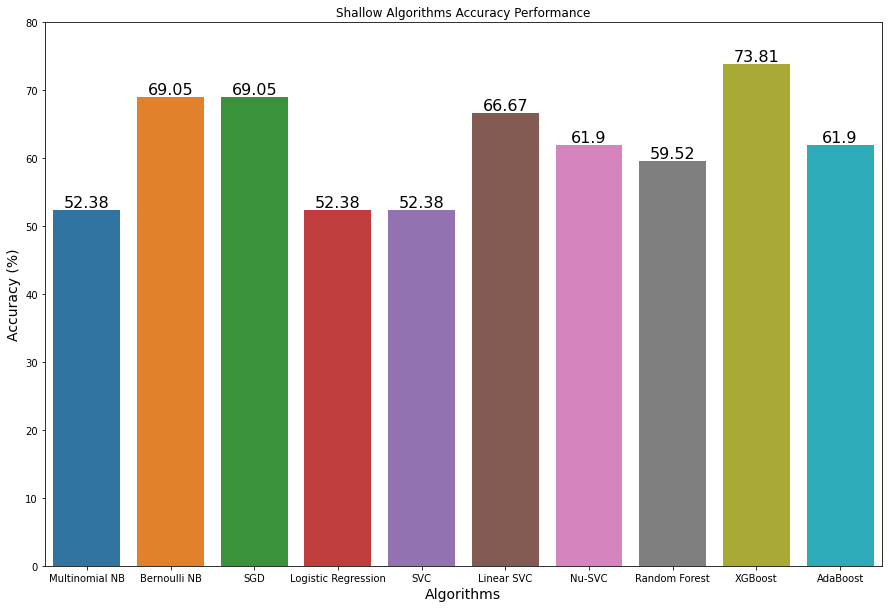

In [7]:
# All shallow algorithms (default parameters)
accuracy_values = [52.38,69.05,69.05,52.38,52.38,66.67,61.90,59.52,73.81,61.90]
algos = ["Multinomial NB","Bernoulli NB","SGD","Logistic Regression","SVC","Linear SVC","Nu-SVC","Random Forest", "XGBoost","AdaBoost"]

plotdata = pd.DataFrame({
    "Accuracy" : accuracy_values,
    }, 
    index = algos
)

plt.figure(figsize=(15,10))
plt.title('Shallow Algorithms Accuracy Performance')
ax = sns.barplot(x=algos, y=accuracy_values, data=plotdata)
plt.ylabel("Accuracy (%)", size=14)
plt.xlabel("Algorithms", size=14)
plt.ylim(0,80)
plt.bar_label(ax.containers[0], size=16, label_type='edge')  

#plt.savefig('Shallow Algorithm Performance.png', bbox_inches="tight")

[Text(0, 0, '69.05'),
 Text(0, 0, '78.57'),
 Text(0, 0, '73.81'),
 Text(0, 0, '71.43'),
 Text(0, 0, '73.81')]

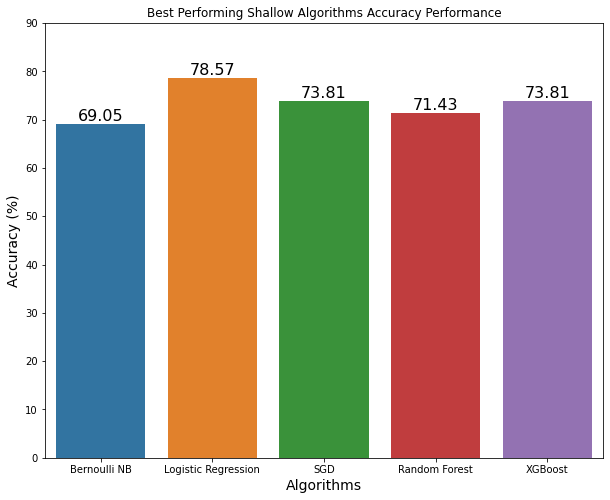

In [8]:
# Best Performing Shallow Algorithms (Accuracy)
accuracy_values = [69.05, 78.57, 73.81, 71.43, 73.81]
algos = ["Bernoulli NB", "Logistic Regression", "SGD", "Random Forest", "XGBoost"]

plotdata = pd.DataFrame({
    "Accuracy" : accuracy_values,
    }, 
    index = algos
)

plt.figure(figsize=(10, 8))
plt.title('Best Performing Shallow Algorithms Accuracy Performance')
ax = sns.barplot(x=algos, y=accuracy_values, data=plotdata)
plt.ylabel("Accuracy (%)", size=14)
plt.xlabel("Algorithms", size=14)
plt.ylim(0,90)
plt.bar_label(ax.containers[0],size=16,label_type='edge')

#plt.savefig('Best Performing Shallow Algorithms (Accuracy).png', bbox_inches="tight")

[Text(0, 0, '69.03'),
 Text(0, 0, '78.46'),
 Text(0, 0, '73.79'),
 Text(0, 0, '70.35'),
 Text(0, 0, '73.79')]

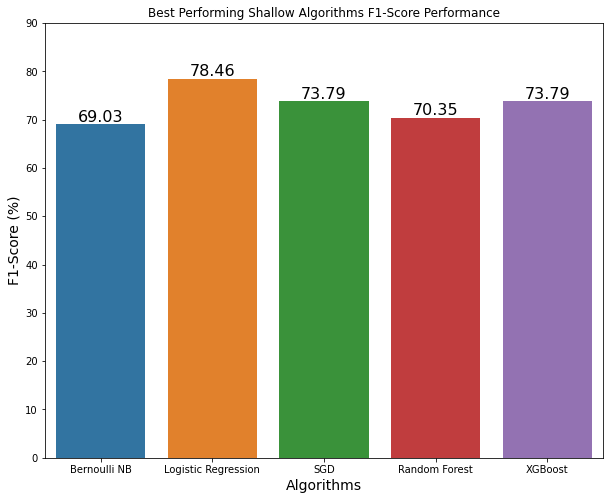

In [9]:
# Best Performing Shallow Algorithms (F1-Score)
F1_values = [69.03, 78.46, 73.79, 70.35, 73.79]
algos = ["Bernoulli NB", "Logistic Regression", "SGD", "Random Forest", "XGBoost"]

plotdata = pd.DataFrame({
    "F1-Score" : F1_values,
    }, 
    index = algos
)

plt.figure(figsize=(10, 8))
plt.title('Best Performing Shallow Algorithms F1-Score Performance')
ax = sns.barplot(x=algos, y=F1_values, data=plotdata)
plt.ylabel("F1-Score (%)", size=14)
plt.xlabel("Algorithms", size=14)
plt.ylim(0,90)
plt.bar_label(ax.containers[0],size=16,label_type='edge') 

#plt.savefig('Best Performing Shallow Algorithms (F1-Score).png', bbox_inches="tight")

[Text(0, 0, '69.03'),
 Text(0, 0, '78.46'),
 Text(0, 0, '73.79'),
 Text(0, 0, '70.35'),
 Text(0, 0, '73.79')]

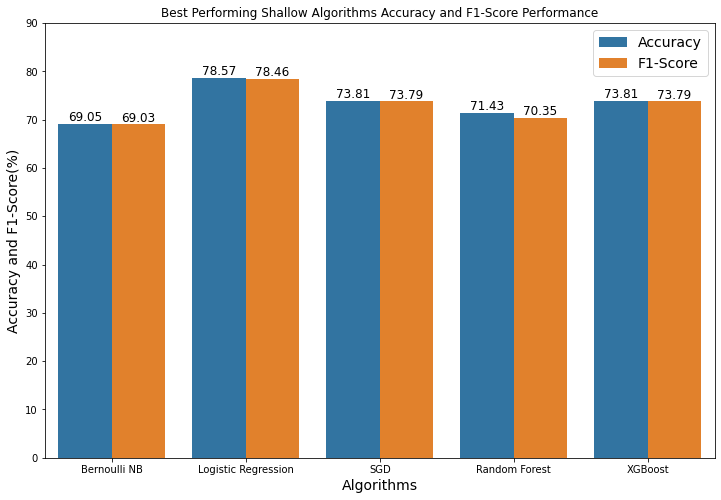

In [10]:
# Best Performing Shallow Algorithms (Both)
accuracy_values = [69.05, 78.57, 73.81, 71.43, 73.81]
F1_values = [69.03, 78.46, 73.79, 70.35, 73.79]
algos = ["Bernoulli NB", "Logistic Regression", "SGD", "Random Forest", "XGBoost"]

plotdata = pd.DataFrame({
    "Type" : ["Accuracy","Accuracy","Accuracy","Accuracy","Accuracy","F1-Score","F1-Score","F1-Score","F1-Score","F1-Score"],
    "Algorithm" : algos + algos,
    "Accuracy and F1-Score" : accuracy_values + F1_values
    }
)

plt.figure(figsize=(12, 8))
plt.title('Best Performing Shallow Algorithms Accuracy and F1-Score Performance')
ax = sns.barplot(x="Algorithm", y="Accuracy and F1-Score", data=plotdata, hue="Type")
legend = ax.legend()
legend.texts[0].set_text("Accuracy")
plt.legend(prop={'size': 14})
plt.ylabel("Accuracy and F1-Score(%)", size=14)
plt.xlabel("Algorithms", size=14)
plt.ylim(0,90)
plt.bar_label(ax.containers[0],size=12,label_type='edge')
plt.bar_label(ax.containers[1],size=12,label_type='edge')

#plt.savefig('Best Performing Shallow Algorithms (Both).png', bbox_inches="tight")

[Text(0, 0, '69.05'),
 Text(0, 0, '78.57'),
 Text(0, 0, '73.81'),
 Text(0, 0, '71.43'),
 Text(0, 0, '73.81')]

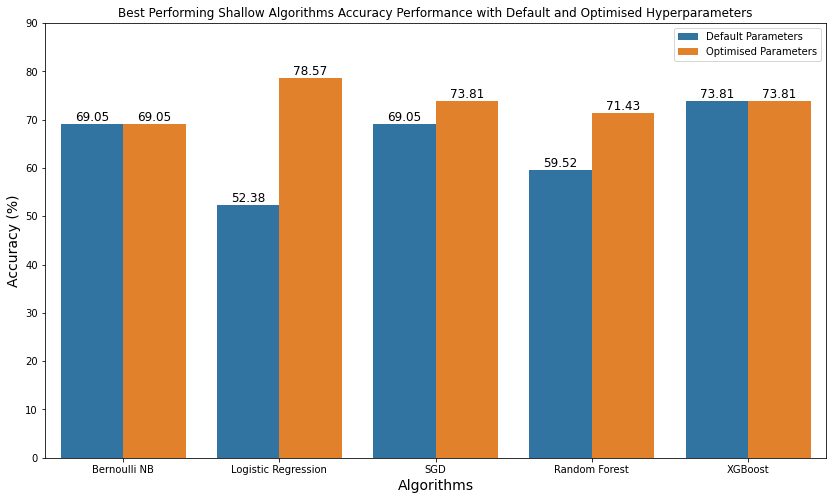

In [11]:
# Best Performing Shallow Algorithms (default vs optimised parameters)
accuracy_values_default = [69.05, 52.38, 69.05, 59.52, 73.81]
accuracy_values_optimised = [69.05, 78.57, 73.81, 71.43, 73.81]
algos = ["Bernoulli NB", "Logistic Regression", "SGD", "Random Forest", "XGBoost"]

plotdata = pd.DataFrame({
    "Type" : ["Default Parameters","Default Parameters","Default Parameters","Default Parameters","Default Parameters","Optimised Parameters","Optimised Parameters","Optimised Parameters","Optimised Parameters","Optimised Parameters"],
    "Algorithm" : algos + algos,
    "Default and Optimised Parameters" : accuracy_values_default + accuracy_values_optimised
    }
)

plt.figure(figsize=(14, 8))
plt.title('Best Performing Shallow Algorithms Accuracy Performance with Default and Optimised Hyperparameters')
ax = sns.barplot(x="Algorithm", y="Default and Optimised Parameters", data=plotdata, hue="Type")
legend = ax.legend()
legend.texts[0].set_text("Default Parameters")
plt.ylabel("Accuracy (%)", size=14)
plt.xlabel("Algorithms", size=14)
plt.ylim(0,90)
plt.bar_label(ax.containers[0],size=12,label_type='edge')
plt.bar_label(ax.containers[1],size=12,label_type='edge')  

#plt.savefig('Best Performing Shallow Algorithms (default vs optimised parameters).png', bbox_inches="tight")

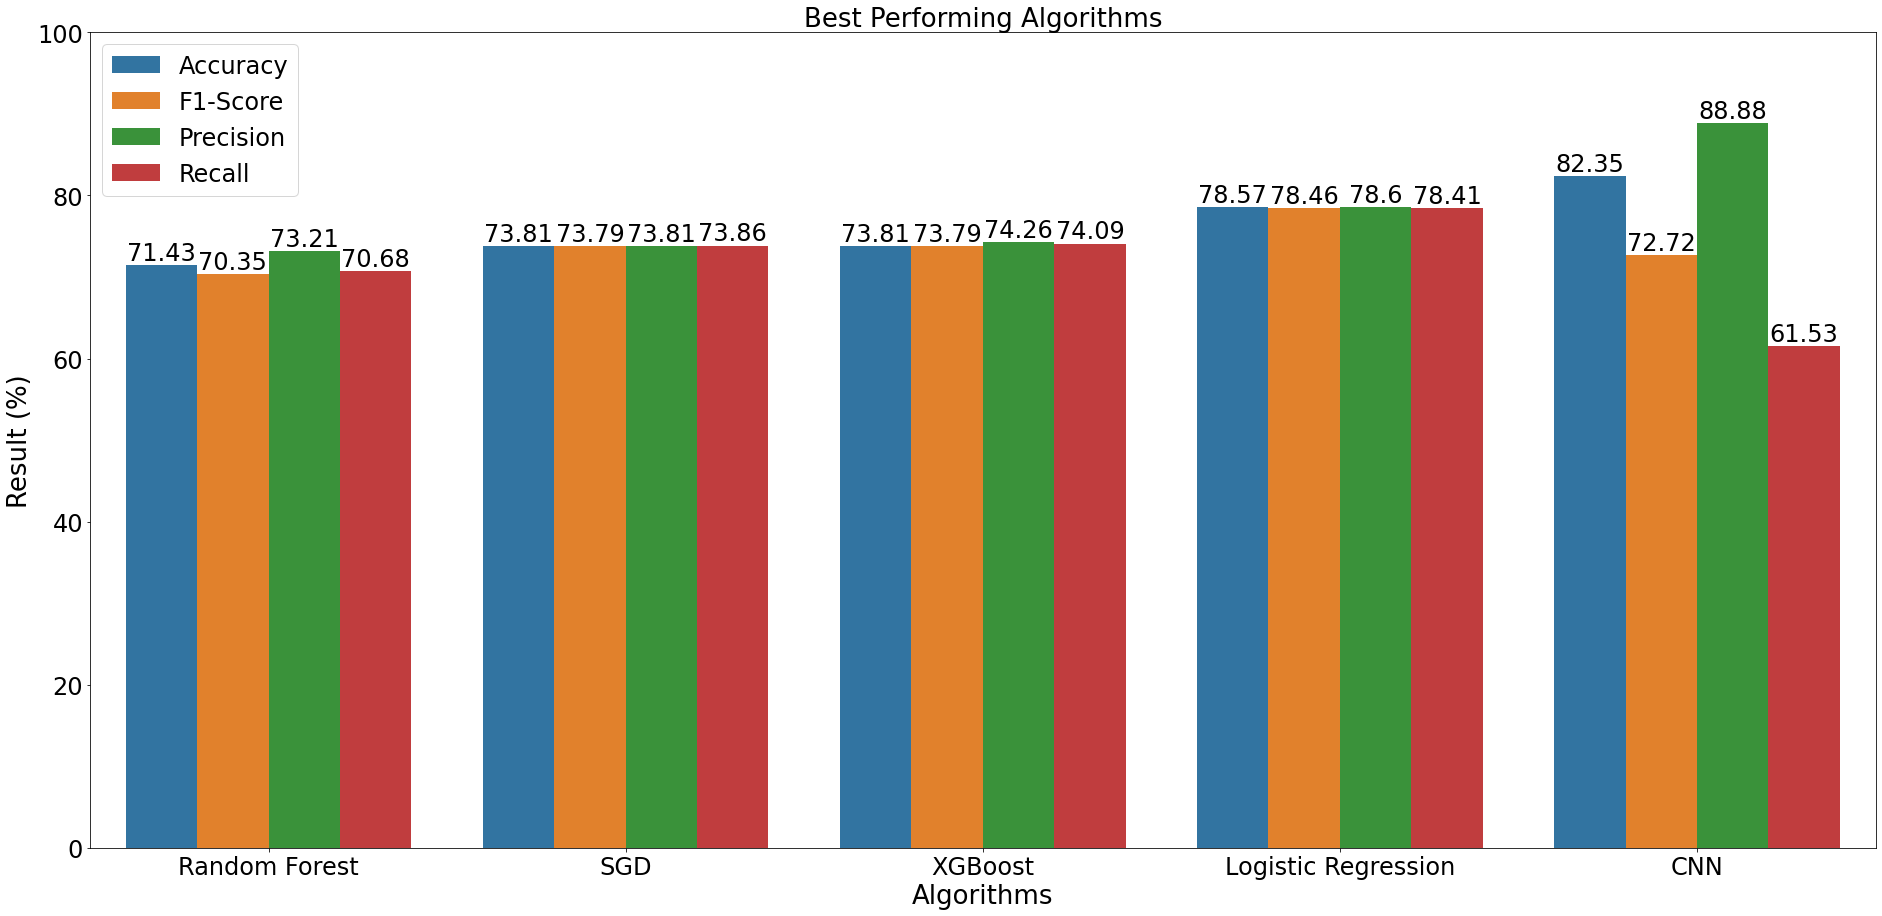

In [16]:
# Best Performing Algorithms
accuracy_values = [71.43, 73.81, 73.81, 78.57, 82.35]
F1_values = [70.35, 73.79, 73.79, 78.46, 72.72]
precision = [73.21, 73.81, 74.26, 78.60, 88.88]
recall = [70.68, 73.86, 74.09, 78.41, 61.53]
algos = ["Random Forest", "SGD", "XGBoost", "Logistic Regression", "CNN"]

plotdata = pd.DataFrame({
    "Type" : ["Accuracy"]*5 + ["F1-Score"]*5 + ["Precision"]*5 + ["Recall"]*5,
    "Algorithm" : algos + algos + algos + algos,
    "Accuracy, F1-Score, precicison, recall" : accuracy_values + F1_values + precision + recall
    }
)

#plt.figure(figsize=(25, 12))
plt.figure(figsize=(32, 15))
plt.title('Best Performing Algorithms', size=26)
ax = sns.barplot(x="Algorithm", y="Accuracy, F1-Score, precicison, recall", data=plotdata, hue="Type")
legend = ax.legend()
legend.texts[0].set_text("Accuracy")
plt.legend(prop={'size': 24})
plt.xticks(size=24)
plt.yticks(size=24)
plt.ylabel("Result (%)", size=26)
plt.xlabel("Algorithms", size=26)
plt.ylim(0,100)
for i in range(4):
    plt.bar_label(ax.containers[i], label_type='edge', size=24)

#plt.savefig('Best Performing Algorithms (All).png', bbox_inches="tight")

# Multiclass

[Text(0, 0, '64.71'),
 Text(0, 0, '58.82'),
 Text(0, 0, '66.67'),
 Text(0, 0, '66.67'),
 Text(0, 0, '54.9'),
 Text(0, 0, '54.9'),
 Text(0, 0, '39.22'),
 Text(0, 0, '50.98')]

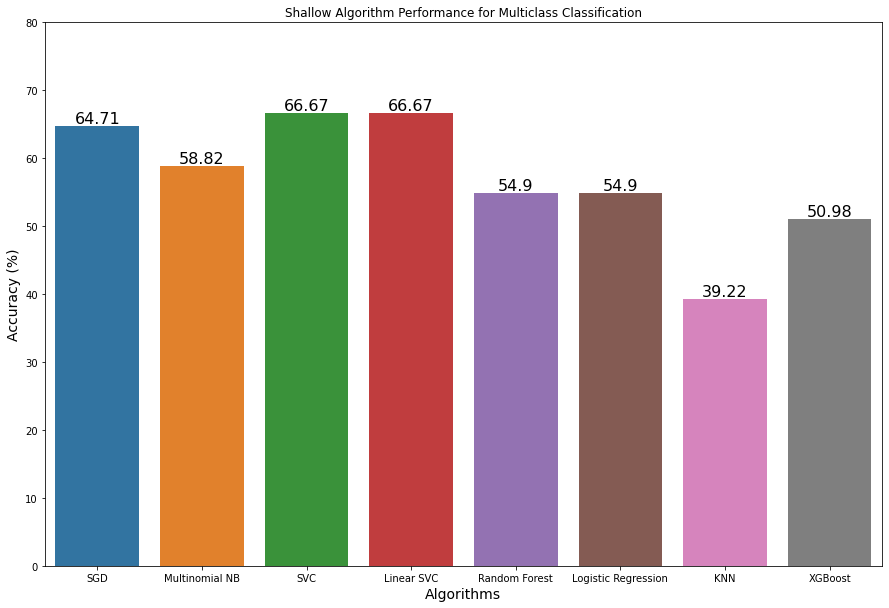

In [13]:
# All shallow algorithms (default parameters)
accuracy_values = [64.71, 58.82, 66.67, 66.67, 54.90, 54.90, 39.22, 50.98]
algos = ["SGD","Multinomial NB","SVC","Linear SVC","Random Forest", "Logistic Regression","KNN","XGBoost"]

plotdata = pd.DataFrame({
    "Accuracy" : accuracy_values,
    }, 
    index = algos
)

plt.figure(figsize=(15,10))
plt.title('Shallow Algorithm Performance for Multiclass Classification')
ax = sns.barplot(x=algos, y=accuracy_values, data=plotdata)
plt.ylabel("Accuracy (%)", size=14)
plt.xlabel("Algorithms", size=14)
plt.ylim(0,80)
plt.bar_label(ax.containers[0], size=16, label_type='edge')  

#plt.savefig('Shallow Algorithm Performance for Multiclass Classification.png', bbox_inches="tight")